In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create generators
train_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
val_gen = ImageDataGenerator(rescale=1./255)

# Load images
train_data = train_gen.flow_from_directory(
    'data/melanoma_cancer_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_data = val_gen.flow_from_directory(
    'data/melanoma_cancer_dataset/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

print("✅ Data ready!")
print(f"Train: {train_data.samples}")
print(f"Val: {val_data.samples}")

C:\Users\aounm\AppData\Roaming\Python\Python313\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Found 8165 images belonging to 2 classes.
Found 2663 images belonging to 2 classes.
✅ Data ready!
Train: 8165
Val: 2663


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build simple CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Show model
model.summary()

print("✅ Model created!")

C:\Users\aounm\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

✅ Model created!


In [3]:
# Train the model
print("Training started... this will take 10-15 minutes")

history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

print("✅ Training complete!")

Training started... this will take 10-15 minutes
Epoch 1/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - accuracy: 0.7273 - loss: 0.5352 - val_accuracy: 0.8509 - val_loss: 0.3296
Epoch 2/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.8472 - loss: 0.3537 - val_accuracy: 0.8689 - val_loss: 0.3024
Epoch 3/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.8702 - loss: 0.3144 - val_accuracy: 0.8644 - val_loss: 0.2992
Epoch 4/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.8776 - loss: 0.3022 - val_accuracy: 0.8952 - val_loss: 0.2528
Epoch 5/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 276s 1s/step - accuracy: 0.8790 - loss: 0.2872 - val_accuracy: 0.8919 - val_loss: 0.2502
Epoch 6/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 274s 1s/step - accuracy: 0.8863 - loss: 0.2713 - val_accuracy: 0.8971 - val_loss: 0.2480
Epoch 7/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 295s 1s/step - accuracy: 0.8901 - loss: 0.2682 - val_accuracy: 0.8712 - val_loss: 0.2863
Epoch 8/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 285s 1s/

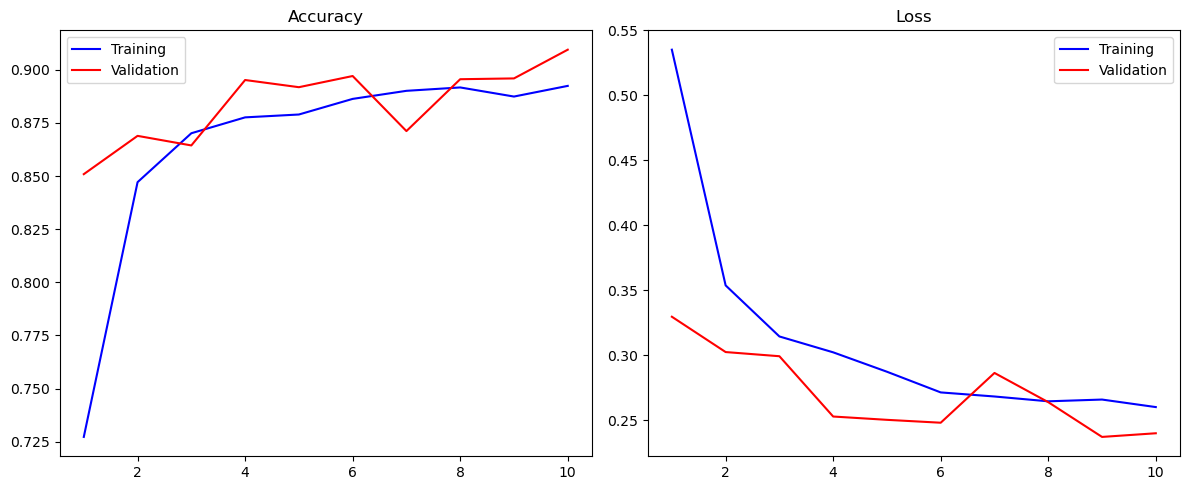

Final Training Accuracy: 89.25%
Final Validation Accuracy: 90.95%


In [4]:
import matplotlib.pyplot as plt

# Get training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training')
plt.plot(epochs, val_loss, 'r', label='Validation')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Print final results
print(f"Final Training Accuracy: {acc[-1]*100:.2f}%")
print(f"Final Validation Accuracy: {val_acc[-1]*100:.2f}%")

In [5]:
# Load test data
test_gen = ImageDataGenerator(rescale=1./255)

test_data = test_gen.flow_from_directory(
    'data/melanoma_cancer_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_data)

print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")
print(f"✅ Test Loss: {test_loss:.4f}")

Found 1000 images belonging to 2 classes.
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 451ms/step - accuracy: 0.9000 - loss: 0.2313

✅ Test Accuracy: 90.00%
✅ Test Loss: 0.2313


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step 


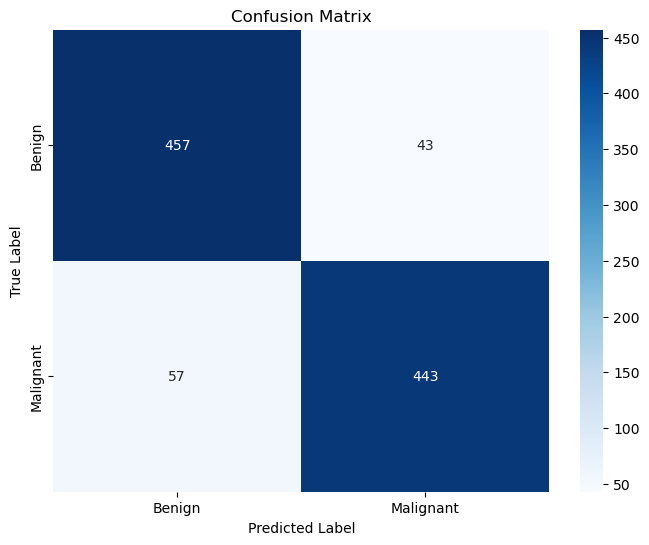


Classification Report:
              precision    recall  f1-score   support

      Benign       0.89      0.91      0.90       500
   Malignant       0.91      0.89      0.90       500

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



In [6]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Get predictions
predictions = model.predict(test_data)
y_pred = (predictions > 0.5).astype(int).flatten()
y_true = test_data.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks([0.5, 1.5], ['Benign', 'Malignant'])
plt.yticks([0.5, 1.5], ['Benign', 'Malignant'])
plt.show()

# Print report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Benign', 'Malignant']))

In [7]:
# Save model
model.save('skin_cancer_model.h5')
print("✅ Model saved as 'skin_cancer_model.h5'")

# Save training history
import pickle

with open('training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

print("✅ Training history saved!")

✅ Model saved as 'skin_cancer_model.h5'
✅ Training history saved!
